# Importing everything I need

In [1]:
import statistics
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## determine path

In [9]:
path = "D:\\Documents\\4. PhD\\Courses\\Python\\session3"

### load the results from the lexical decision task and print a summary

In [38]:
results = pd.read_csv(os.path.join(path, 'results.csv'))

# adding an additional column with a subject id because otherwise I cannot run the Anova
results['id'] = '1'

#no need for a for loop because I only have one participant
summary = results.groupby(by='type').aggregate( #multiple columns (by='id', 'condition')
    mean_RT = pd.NamedAgg('reaction_time',np.mean),
    std_RT = pd.NamedAgg('reaction_time',np.std)
)

print(summary)

       mean_RT    std_RT
type                    
HF    1.059540  0.518529
LF    1.096717  0.350253
none  1.093136  0.341250


### plotting the results in a boxplot

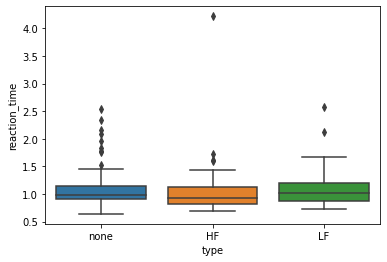

In [17]:
ax = sns.boxplot(x="type", y="reaction_time", data= results)

In [18]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

### T-test

In [35]:
HF = results.loc[results['type']=='HF', 'reaction_time']
LF = results.loc[results['type']=='LF', 'reaction_time']

ttest_HFLF= stats.ttest_rel(HF,LF,nan_policy='raise')
ttest_HFLF.statistic
ttest_HFLF.pvalue

# ttest just to try it out. But I would like to have multiple comparisons (HF vs. LF vs. NW) so I will run an Anova

0.6853050195193318

### Anova for multiple comparisons

In [36]:
aov = AnovaRM(
    results,
    depvar='reaction_time',
    subject= 'id',
    within=['type'],
    aggregate_func='mean'
).fit()

print(aov)

# I don't get a proper result from the Anova but I don't fully understand why.

              Anova
     F Value Num DF Den DF Pr > F
---------------------------------
type  0.0000 2.0000 0.0000    nan



d:\documents\4. phd\courses\python\venv\lib\site-packages\statsmodels\stats\anova.py:594: RuntimeWarning: divide by zero encountered in double_scalars
  mse = ssr / df_resid
